<a href="https://colab.research.google.com/github/kundajelab/adar_editing/blob/master/xgboost_with_shap/ALL_COMPUTATIONAL_SUBSTRATES_XGBOOST_WITH_TREESHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy==1.15


In [ ]:

## Uncomment these lines if running as a google colab notebook: 
! git clone https://github.com/kundajelab/adar_editing
import os
os.chdir("adar_editing/xgboost_with_shap/")
!pip install shap
!pip install --upgrade xgboost
!pip install cufflinks


In [1]:
%load_ext autoreload
%autoreload 2   

In [2]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))


In [23]:
#helper utilities for model training and interpretation 
import shap
from helpers import * 

#set a random seed so code is reproducible 
random.seed(1234)

# load JS visualization code to notebook
shap.initjs()
import warnings
warnings.filterwarnings('ignore')

#visualization utilities 
import matplotlib
import matplotlib.pyplot as plt 
#%matplotlib inline
import plotly.plotly as py
import numpy as np
from plotly.offline import iplot
from plotly.graph_objs import Heatmap



## Substrates combined, xgboost with TreeShap <a name='outline'>
<ol>
    <li><a href=#1>All features</a></li>
    <li><a href=#2>Feature subsets</a></li>
 </ol>


## All features<a name='1'>
<a href=#outline>Home</a>

In [4]:
## Read in the data 
import pandas as pd 

In [5]:
data_neil_comp=pd.read_csv("../xin_feature_matrices/neil1_computational.features.csv",header=0,sep=',',index_col=0)
#remove any null editing level values 
data_neil_comp=data_neil_comp[~data_neil_comp["editing_value"].isnull().values]
## prepare data for training with xgboost 
data_neil_comp=format_for_xgboost(data_neil_comp)
train_split2,eval_split2,test_split2=split_train_test_eval_by_mut_pos(data_neil_comp[~data_neil_comp['mut_pos'].isna()])
null_mut_pos=data_neil_comp[data_neil_comp['mut_pos'].isna()]
train_split2=pd.concat((train_split2,null_mut_pos),axis=0)

train_split2['dataset']="NEIL1_COMP"
eval_split2['dataset']="NEIL1_COMP"
test_split2['dataset']="NEIL1_COMP"

(428, 218)
{20.0: 3, 21.0: 3, 22.0: 3, 23.0: 4, 24.0: 3, 25.0: 4, 26.0: 3, 27.0: 4, 28.0: 4, 29.0: 4, 30.0: 3, 31.0: 4, 32.0: 4, 33.0: 4, 34.0: 4, 35.0: 4, 36.0: 4, 41.0: 20, 42.0: 21, 43.0: 18, 44.0: 18, 45.0: 20, 46.0: 19, 48.0: 20, 49.0: 21, 50.0: 21, 51.0: 20, 52.0: 20, 53.0: 21, 54.0: 19, 55.0: 21, 56.0: 20, 57.0: 15, 58.0: 31}


In [6]:
data_ttyh2_comp=pd.read_csv("../xin_feature_matrices/ttyh2_computational.features.csv",header=0,sep=',',index_col=0)
#remove any null editing level values 
data_ttyh2_comp=data_ttyh2_comp[~data_ttyh2_comp["editing_value"].isnull().values]
## prepare data for training with xgboost 
data_ttyh2_comp=format_for_xgboost(data_ttyh2_comp)
train_split4,eval_split4,test_split4=split_train_test_eval_by_mut_pos(data_ttyh2_comp[~data_ttyh2_comp['mut_pos'].isna()])
null_mut_pos=data_ttyh2_comp[data_ttyh2_comp['mut_pos'].isna()]
train_split4=pd.concat((train_split4,null_mut_pos),axis=0)

train_split4['dataset']="TTYH2_COMP"
eval_split4['dataset']="TTYH2_COMP"
test_split4['dataset']="TTYH2_COMP"



(601, 215)
{21.0: 18, 22.0: 18, 23.0: 18, 24.0: 20, 25.0: 17, 26.0: 20, 27.0: 20, 28.0: 20, 29.0: 18, 30.0: 18, 31.0: 17, 32.0: 17, 33.0: 17, 34.0: 18, 35.0: 18, 36.0: 18, 79.0: 17, 80.0: 17, 81.0: 18, 82.0: 18, 83.0: 19, 84.0: 19, 85.0: 20, 86.0: 29, 88.0: 27, 89.0: 18, 90.0: 17, 91.0: 17, 92.0: 17, 93.0: 14, 94.0: 36}


In [7]:
data_ajuba=pd.read_csv("../xin_feature_matrices/ajuba_bc_computational.features.csv",header=0,sep=',',index_col=0)
#remove any null editing level values 
data_ajuba=data_ajuba[~data_ajuba["editing_value"].isnull().values]
## prepare data for training with xgboost 
data_ajuba=format_for_xgboost(data_ajuba)
train_split5,eval_split5,test_split5=split_train_test_eval_by_mut_pos(data_ajuba[~data_ajuba['mut_pos'].isna()])
null_mut_pos=data_ajuba[data_ajuba['mut_pos'].isna()]
train_split5=pd.concat((train_split5,null_mut_pos),axis=0)

train_split5['dataset']="AJUBA"
eval_split5['dataset']="AJUBA"
test_split5['dataset']="AJUBA"


(482, 185)
{64.0: 22, 65.0: 21, 66.0: 22, 67.0: 22, 68.0: 22, 69.0: 23, 70.0: 23, 71.0: 24, 72.0: 23, 73.0: 33, 75.0: 33, 76.0: 24, 77.0: 24, 78.0: 23, 79.0: 23, 80.0: 22, 81.0: 22, 82.0: 22, 83.0: 44}


In [8]:
train_split=pd.concat([train_split2,train_split4,train_split5])
eval_split=pd.concat([eval_split2,eval_split4,eval_split5])
test_split=pd.concat([test_split2,test_split4,test_split5])

train_split.reset_index(inplace=True, drop=True) 
eval_split.reset_index(inplace=True,drop=True)
test_split.reset_index(inplace=True,drop=True)

In [9]:
train_dataset=train_split['dataset']
eval_dataset=eval_split['dataset']
test_dataset=test_split['dataset']

In [10]:
#Remove any non-varying features 
train_novar=get_singleval_features(train_split)
eval_novar=get_singleval_features(eval_split)
test_novar=get_singleval_features(test_split)
uniform_features_to_drop=list(set(train_novar+eval_novar+test_novar))

In [11]:
#Remove any null features 
train_null=get_all_null_features(train_split)
eval_null=get_all_null_features(eval_split)
test_null=get_all_null_features(test_split)
null_features_to_drop=list(set(train_null+eval_null+test_null))

In [12]:
to_drop=list(set(uniform_features_to_drop+null_features_to_drop))
to_drop.append('dataset')
print("\n".join(to_drop))

u3_length_internal_es
u1_5prm_cp_internal
mut_exist
mut_type:wt
u2_3prm_cp_internal
site_5prm_cp_hairpin
d2_5prm_cp_hairpin
d2_5prm_cp_bulge
u3_3prm_cp_internal
mut_type:mismatch
u3_5prm_cp_internal
u1_length_internal_ecs
d1_exist
d1_5prm_cp_hairpin
d2_3prm_cp_bulge
u2_length_internal_es
mut_type:indel
mut_same_as_site
d1_3prm_cp_bulge
d2_exist
u3_length_internal_ecs
u2_length_internal_ecs
u1_exist
d3_3prm_cp_bulge
d3_length_hairpin
u1_5prm_cp_hairpin
u2_exist
d3_length_bulge
u1_length_hairpin
d3_5prm_cp_bulge
d3_5prm_cp_hairpin
u1_3prm_cp_internal
u1_length_internal_es
d1_length_hairpin
d2_length_hairpin
d1_5prm_cp_bulge
u2_5prm_cp_internal
dataset


In [13]:
#remove teh features that don't change across isoforms , or are null for all isoforms
train_split=train_split.drop(to_drop,axis=1)
eval_split=eval_split.drop(to_drop,axis=1)
test_split=test_split.drop(to_drop,axis=1)

In [14]:

train_y=train_split['editing_value']
train_X=train_split.drop(['editing_value'],axis=1)
eval_y=eval_split['editing_value']
eval_X=eval_split.drop(['editing_value'],axis=1)
test_y=test_split['editing_value']
test_X=test_split.drop(['editing_value'],axis=1)

In [15]:
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)


(967, 234)
(967,)
(223, 234)
(223,)
(265, 234)
(265,)


In [16]:
## format matrixes for xgboost 
import xgboost
dtrain=xgboost.DMatrix(train_X,train_y)
deval=xgboost.DMatrix(eval_X,eval_y)
dtest=xgboost.DMatrix(test_X,test_y)

In [17]:
## set model training parameters 
from __future__ import unicode_literals
param=dict() 
param['nthread'] = 20
#rmse -- root mean square error 
# mae -- mean absolute error 
# map -- mean average precision 
# auc -- area under ROC curve 
# aucpr -- area under precision recall curve 

#Note: the last metric in your 'eval_metric' list will get optimized 
param['eval_metric'] = ['aucpr','auc','mae','map','rmse']

In [18]:
evallist = [(deval, 'eval'), (dtrain, 'train')]


In [19]:
num_round = 1000
bst = xgboost.train(param, dtrain, num_round, evallist,early_stopping_rounds=10)

[09:49:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[0]	eval-aucpr:0.329438	eval-auc:0.763138	eval-mae:0.267817	eval-map:1	eval-rmse:0.286082	train-aucpr:0.462192	train-auc:0.821737	train-mae:0.26043	train-map:1	train-rmse:0.282043
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 10 rounds.
[09:49:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[1]	eval-aucpr:0.338528	eval-auc:0.783157	eval-mae:0.192654	eval-map:1	eval-rmse:0.207947	train-aucpr:0.472467	train-auc:0.834662	train-mae:0.187496	train-map:1	train-rmse:0.204119
[09:49:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[2]	eval-aucpr:0.351465	eval-auc:0.801882	eval-mae:0.142509	eval-map:1	eval-rmse:0.154682	train-aucpr:0.478207	train-auc:0.83

[09:49:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=6
[27]	eval-aucpr:0.384788	eval-auc:0.81622	eval-mae:0.03637	eval-map:1	eval-rmse:0.057308	train-aucpr:0.503418	train-auc:0.856763	train-mae:0.017299	train-map:1	train-rmse:0.026607
[09:49:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=6
[28]	eval-aucpr:0.384792	eval-auc:0.816271	eval-mae:0.036219	eval-map:1	eval-rmse:0.057129	train-aucpr:0.503695	train-auc:0.857008	train-mae:0.016902	train-map:1	train-rmse:0.025955
[09:49:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[29]	eval-aucpr:0.384775	eval-auc:0.816268	eval-mae:0.036106	eval-map:1	eval-rmse:0.057075	train-aucpr:0.503769	train-auc:0.857142	train-mae:0.016644	train-map:1	train-rmse:0.02566
[09:49:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra 

[09:49:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[54]	eval-aucpr:0.387241	eval-auc:0.818619	eval-mae:0.034166	eval-map:1	eval-rmse:0.053944	train-aucpr:0.506947	train-auc:0.858921	train-mae:0.011724	train-map:1	train-rmse:0.018495
[09:49:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[55]	eval-aucpr:0.386623	eval-auc:0.818692	eval-mae:0.03412	eval-map:1	eval-rmse:0.053945	train-aucpr:0.506981	train-auc:0.858977	train-mae:0.011524	train-map:1	train-rmse:0.018305
[09:49:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[56]	eval-aucpr:0.386664	eval-auc:0.818757	eval-mae:0.034013	eval-map:1	eval-rmse:0.053885	train-aucpr:0.507014	train-auc:0.859015	train-mae:0.011424	train-map:1	train-rmse:0.018227
[09:49:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extr

[09:49:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[81]	eval-aucpr:0.388891	eval-auc:0.818516	eval-mae:0.033259	eval-map:1	eval-rmse:0.05258	train-aucpr:0.508874	train-auc:0.860026	train-mae:0.007988	train-map:1	train-rmse:0.012768
[09:49:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[82]	eval-aucpr:0.388745	eval-auc:0.817995	eval-mae:0.033558	eval-map:1	eval-rmse:0.052875	train-aucpr:0.508923	train-auc:0.860048	train-mae:0.007856	train-map:1	train-rmse:0.012498
[09:49:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=6
[83]	eval-aucpr:0.38879	eval-auc:0.818163	eval-mae:0.03354	eval-map:1	eval-rmse:0.052862	train-aucpr:0.508941	train-auc:0.860071	train-mae:0.007741	train-map:1	train-rmse:0.012353
[09:49:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra 

[09:49:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=6
[108]	eval-aucpr:0.387932	eval-auc:0.818562	eval-mae:0.033315	eval-map:1	eval-rmse:0.052617	train-aucpr:0.50966	train-auc:0.860543	train-mae:0.005663	train-map:1	train-rmse:0.009186
[09:49:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=6
[109]	eval-aucpr:0.387997	eval-auc:0.818639	eval-mae:0.033279	eval-map:1	eval-rmse:0.052623	train-aucpr:0.509665	train-auc:0.860553	train-mae:0.005599	train-map:1	train-rmse:0.009146
[09:49:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[110]	eval-aucpr:0.387985	eval-auc:0.818662	eval-mae:0.0332	eval-map:1	eval-rmse:0.052716	train-aucpr:0.509896	train-auc:0.860585	train-mae:0.005447	train-map:1	train-rmse:0.008776
[09:49:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 ext

[09:49:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=6
[135]	eval-aucpr:0.387683	eval-auc:0.818801	eval-mae:0.033191	eval-map:1	eval-rmse:0.05291	train-aucpr:0.510127	train-auc:0.860749	train-mae:0.004328	train-map:1	train-rmse:0.007268
[09:49:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[136]	eval-aucpr:0.387829	eval-auc:0.81884	eval-mae:0.033161	eval-map:1	eval-rmse:0.052876	train-aucpr:0.510169	train-auc:0.860766	train-mae:0.004235	train-map:1	train-rmse:0.007107
[09:49:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=6
[137]	eval-aucpr:0.387818	eval-auc:0.818846	eval-mae:0.033133	eval-map:1	eval-rmse:0.052858	train-aucpr:0.510173	train-auc:0.860771	train-mae:0.00419	train-map:1	train-rmse:0.007049
[09:49:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 ext

[09:49:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[162]	eval-aucpr:0.387885	eval-auc:0.818892	eval-mae:0.032889	eval-map:1	eval-rmse:0.052799	train-aucpr:0.510341	train-auc:0.860937	train-mae:0.003213	train-map:1	train-rmse:0.005806
[09:49:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=6
[163]	eval-aucpr:0.387942	eval-auc:0.818989	eval-mae:0.032891	eval-map:1	eval-rmse:0.052812	train-aucpr:0.510346	train-auc:0.86094	train-mae:0.003179	train-map:1	train-rmse:0.005767
[09:49:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[164]	eval-aucpr:0.387948	eval-auc:0.818988	eval-mae:0.032894	eval-map:1	eval-rmse:0.052814	train-aucpr:0.510351	train-auc:0.860942	train-mae:0.003153	train-map:1	train-rmse:0.005729
[09:49:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 e

[09:49:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[189]	eval-aucpr:0.387456	eval-auc:0.819154	eval-mae:0.032892	eval-map:1	eval-rmse:0.05282	train-aucpr:0.510485	train-auc:0.861048	train-mae:0.002421	train-map:1	train-rmse:0.004608
[09:49:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=6
[190]	eval-aucpr:0.387455	eval-auc:0.819152	eval-mae:0.032896	eval-map:1	eval-rmse:0.052829	train-aucpr:0.510486	train-auc:0.86105	train-mae:0.002397	train-map:1	train-rmse:0.004591
[09:49:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[191]	eval-aucpr:0.387419	eval-auc:0.819043	eval-mae:0.032914	eval-map:1	eval-rmse:0.052834	train-aucpr:0.51049	train-auc:0.861056	train-mae:0.002351	train-map:1	train-rmse:0.004539
[09:49:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 ext

[09:49:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=6
[216]	eval-aucpr:0.386951	eval-auc:0.819347	eval-mae:0.032873	eval-map:1	eval-rmse:0.052948	train-aucpr:0.510582	train-auc:0.861111	train-mae:0.001754	train-map:1	train-rmse:0.003629
[09:49:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=6
[217]	eval-aucpr:0.386965	eval-auc:0.819362	eval-mae:0.032875	eval-map:1	eval-rmse:0.052938	train-aucpr:0.510586	train-auc:0.861111	train-mae:0.001733	train-map:1	train-rmse:0.003594
[09:49:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=6
[218]	eval-aucpr:0.38693	eval-auc:0.819281	eval-mae:0.032882	eval-map:1	eval-rmse:0.052954	train-aucpr:0.510586	train-auc:0.861113	train-mae:0.001709	train-map:1	train-rmse:0.003568
[09:49:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 e

In [20]:
# save to binary file for faster loading
bst.save_model('combined.substrates.model')
# save model to text file 
bst.dump_model('combined.substrates.txt')


In [21]:
## get model predictions on the test, training, and eval splits 
test_pred = bst.predict(dtest)
train_pred=bst.predict(dtrain)
eval_pred=bst.predict(deval)

In [28]:
## get performance metrics on full dataset 
from helpers import * 
print_aggregate_peformance_metrics(train_y,train_pred,
                                   eval_y,eval_pred,
                                   test_y,test_pred)

Train
	Spearman corr : SpearmanrResult(correlation=0.9988730725403445, pvalue=0.0)
	Pearson corr : (0.999811299465774, 0.0)
	MAE : 0.0016873258851736771
	MAPE : 0.03237168534144265
	RMSE : 0.0035508228199728972
	auPRC : 0.9999999999999998
	auROC : 0.9999999999999999
Eval
	Spearman corr : SpearmanrResult(correlation=0.8574949270704607, pvalue=1.0234755462897043e-65)
	Pearson corr : (0.935110966882956, 1.5277009802531567e-101)
	MAE : 0.032856686915749174
	MAPE : 0.5849273500873918
	RMSE : 0.05294643923420735
	auPRC : 0.8371523538190206
	auROC : 0.9932502596053998
Test
	Spearman corr : SpearmanrResult(correlation=0.8698576543507561, pvalue=1.0976133832670341e-82)
	Pearson corr : (0.90166673463824, 9.603126697329566e-98)
	MAE : 0.05163321009312036
	MAPE : 0.7109843031989724
	RMSE : 0.07472780062853679
	auPRC : 0.8227627997822506
	auROC : 0.9691836734693878


In [47]:
## get performance on Neil1 subset 
from helpers import * 
cur_split="NEIL1_COMP"
train_subset=train_dataset==cur_split
eval_subset=eval_dataset==cur_split
test_subset=test_dataset==cur_split
print_aggregate_peformance_metrics(train_y[train_subset],train_pred[train_subset],
                                   eval_y[eval_subset],eval_pred[eval_subset],
                                   test_y[test_subset],test_pred[test_subset],
                                   positive_thresh=0.2)

Train
	Spearman corr : SpearmanrResult(correlation=0.9993311017509602, pvalue=0.0)
	Pearson corr : (0.9997059514627701, 0.0)
	MAE : 0.0022684144368586784
	MAPE : 0.017556962140806286
	RMSE : 0.005784653463248493
	auPRC : 1.0
	auROC : 0.9991957243669572
Eval
	Spearman corr : SpearmanrResult(correlation=0.779913005851671, pvalue=4.98201740556157e-14)
	Pearson corr : (0.9159147394905827, 7.256975274930765e-26)
	MAE : 0.05035646633987892
	MAPE : 0.8506422010078231
	RMSE : 0.07903699798773027
	auPRC : 0.9273116685945634
	auROC : 0.9574468085106382
Test
	Spearman corr : SpearmanrResult(correlation=0.9127847036947629, pvalue=1.5391611002357517e-28)
	Pearson corr : (0.9083585052317068, 7.876730163076393e-28)
	MAE : 0.0678152806792461
	MAPE : 0.5054503239971548
	RMSE : 0.09769181477031831
	auPRC : 0.9620661374424619
	auROC : 0.9615079365079365


In [48]:
## get performance on TTYH2 subset 
from helpers import * 
cur_split="TTYH2_COMP"
train_subset=train_dataset==cur_split
eval_subset=eval_dataset==cur_split
test_subset=test_dataset==cur_split
print_aggregate_peformance_metrics(train_y[train_subset],train_pred[train_subset],
                                   eval_y[eval_subset],eval_pred[eval_subset],
                                   test_y[test_subset],test_pred[test_subset],
                                   positive_thresh=0.2)

Train
	Spearman corr : SpearmanrResult(correlation=0.9994397455933829, pvalue=0.0)
	Pearson corr : (0.9998801678955371, 0.0)
	MAE : 0.0013959519728794978
	MAPE : 0.025704762731884358
	RMSE : 0.001990756613718123
	auPRC : 1.0000000000000002
	auROC : 1.0
Eval
	Spearman corr : SpearmanrResult(correlation=0.9214896981861408, pvalue=6.606453680844367e-38)
	Pearson corr : (0.9394812251438235, 1.0381702039371184e-42)
	MAE : 0.03253587254368597
	MAPE : 0.3756501152794084
	RMSE : 0.04597962725382425
	auPRC : 0.9455159248612687
	auROC : 0.9587732528908999
Test
	Spearman corr : SpearmanrResult(correlation=0.8971176352585454, pvalue=2.500536755542888e-38)
	Pearson corr : (0.8326384467463946, 3.4587790362942836e-28)
	MAE : 0.05578784249850681
	MAPE : 0.4902915607382984
	RMSE : 0.07616073419508633
	auPRC : 0.9845615047289612
	auROC : 0.9849596478356566


In [49]:
## get performance on AJUBA subset 
from helpers import * 
cur_split="AJUBA"
train_subset=train_dataset==cur_split
eval_subset=eval_dataset==cur_split
test_subset=test_dataset==cur_split
print_aggregate_peformance_metrics(train_y[train_subset],train_pred[train_subset],
                                   eval_y[eval_subset],eval_pred[eval_subset],
                                   test_y[test_subset],test_pred[test_subset],
                                   positive_thresh=0.07)

Train
	Spearman corr : SpearmanrResult(correlation=0.9915993805005562, pvalue=1.2095348637794906e-267)
	Pearson corr : (0.9993866188604967, 0.0)
	MAE : 0.0015262310698969696
	MAPE : 0.05464829338890287
	RMSE : 0.0021194276265425476
	auPRC : 0.9992063492063492
	auROC : 1.0
Eval
	Spearman corr : SpearmanrResult(correlation=0.6306560348659515, pvalue=4.8789219141313155e-09)
	Pearson corr : (0.868119965001955, 2.2769483931994617e-22)
	MAE : 0.017519361055256536
	MAPE : 0.6148547147264107
	RMSE : 0.024295459636718014
	auPRC : 0.7622023809523809
	auROC : 0.9435483870967742
Test
	Spearman corr : SpearmanrResult(correlation=0.38571429130562357, pvalue=0.00018927379242757812)
	Pearson corr : (0.7970269789253462, 9.405720749633235e-21)
	MAE : 0.03382238521468772
	MAPE : 1.1353174546787455
	RMSE : 0.046588642251154354
	auPRC : 0.9341089158559823
	auROC : 0.9524291497975708


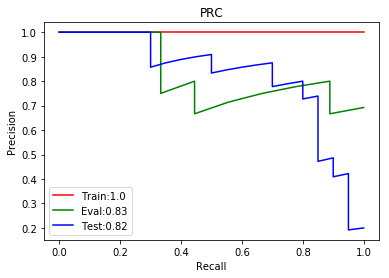

In [25]:
## PRC 
## PRC only valid for binary outcomes. 
## Editing levels < 0.5 are labeled as "0". 
## Editing levels >= 0.5 are labeled as "1". 

from sklearn.metrics import auc, precision_recall_curve

precision_train,recall_train,prc_thresholds_train=precision_recall_curve(train_y>=0.5,train_pred)
precision_eval,recall_eval,prc_thresholds_eval=precision_recall_curve(eval_y>=0.5,eval_pred)
precision_test,recall_test,prc_thresholds_test=precision_recall_curve(test_y>=0.5,test_pred)

auprc_train=auc(recall_train,precision_train)
auprc_eval=auc(recall_eval,precision_eval)
auprc_test=auc(recall_test,precision_test)

plt.plot(recall_train,precision_train,'r',label="Train:"+str(round(auprc_train,2)))
plt.plot(recall_eval,precision_eval,'g',label="Eval:"+str(round(auprc_eval,2)))
plt.plot(recall_test,precision_test,'b',label="Test:"+str(round(auprc_test,2)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC")
plt.legend()

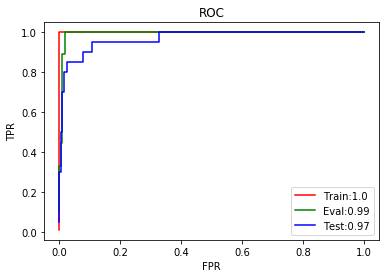

In [26]:
## ROC
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train,tpr_train,roc_thresholds_train=roc_curve(train_y>=0.5,train_pred)
fpr_eval,tpr_eval,roc_thresholds_eval=roc_curve(eval_y>=0.5,eval_pred)
fpr_test,tpr_test,roc_thresholds_test=roc_curve(test_y>=0.5,test_pred)

auroc_train=roc_auc_score(train_y>=0.5,train_pred)
auroc_eval=roc_auc_score(eval_y>=0.5,eval_pred)
auroc_test=roc_auc_score(test_y>=0.5,test_pred)

plt.plot(fpr_train,tpr_train,'r',label="Train:"+str(round(auroc_train,2)))
plt.plot(fpr_eval,tpr_eval,'g',label="Eval:"+str(round(auroc_eval,2)))
plt.plot(fpr_test,tpr_test,'b',label="Test:"+str(round(auroc_test,2)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()

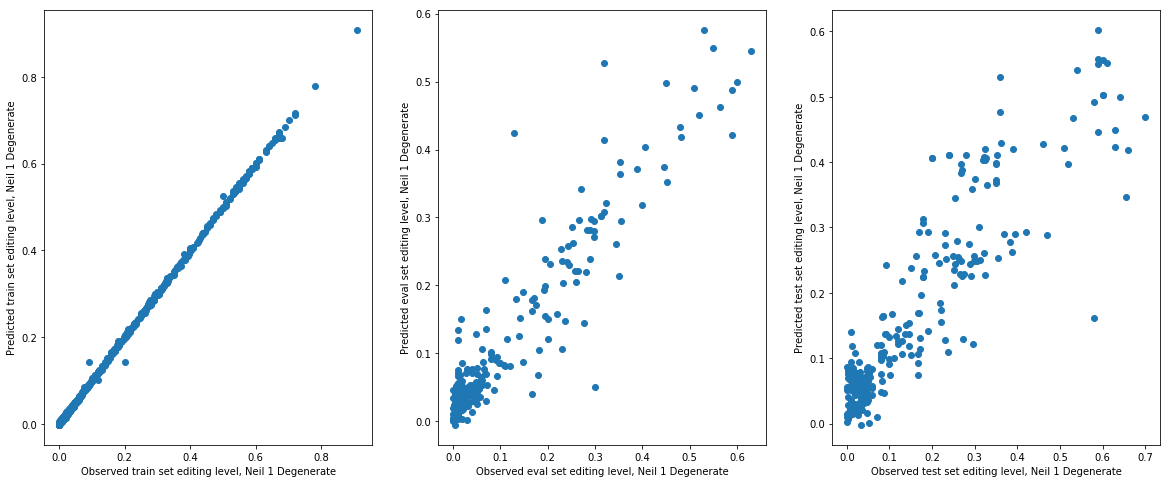

In [27]:
#plot the test set predictions 
matplotlib.rcParams['figure.figsize'] = [20, 8]
plt.subplot(1,3,1)
plt.plot(list(train_y),list(train_pred),'o')
plt.xlabel("Observed train set editing level, Neil 1 Degenerate")
plt.ylabel("Predicted train set editing level, Neil 1 Degenerate")
plt.subplot(1,3,2)
plt.plot(list(eval_y),list(eval_pred),'o')
plt.xlabel("Observed eval set editing level, Neil 1 Degenerate")
plt.ylabel("Predicted eval set editing level, Neil 1 Degenerate")
plt.subplot(1,3,3)
plt.plot(list(test_y),list(test_pred),'o')
plt.xlabel("Observed test set editing level, Neil 1 Degenerate")
plt.ylabel("Predicted test set editing level, Neil 1 Degenerate")

plt.show()

In [40]:
import plotnine
from plotnine import *
test_df=pd.DataFrame({'Observed':test_y,
                     'Predicted':test_pred,
                     'Dataset':test_dataset})

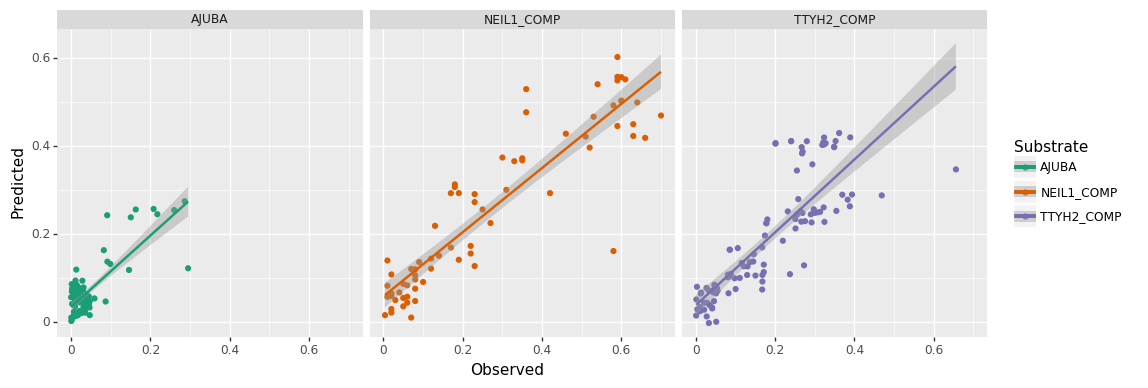

<ggplot: (8785150423963)>


/users/annashch/miniconda3/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning:

Saving 12 x 4 in image.

/users/annashch/miniconda3/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning:

Filename: all.comp.substrates.svg



In [41]:
plotnine.options.figure_size = (12, 4)

p=(ggplot(test_df, aes('Observed', 'Predicted', color='factor(Dataset)'))
 + geom_point()
 + stat_smooth(method='lm')
 + scale_color_manual(values=['#1b9e77','#d95f02','#7570b3'],name="Substrate")
 + facet_wrap('~Dataset'))
print(p)
ggsave(plot=p, filename='all.comp.substrates.svg',width=12,height=4,units='in')


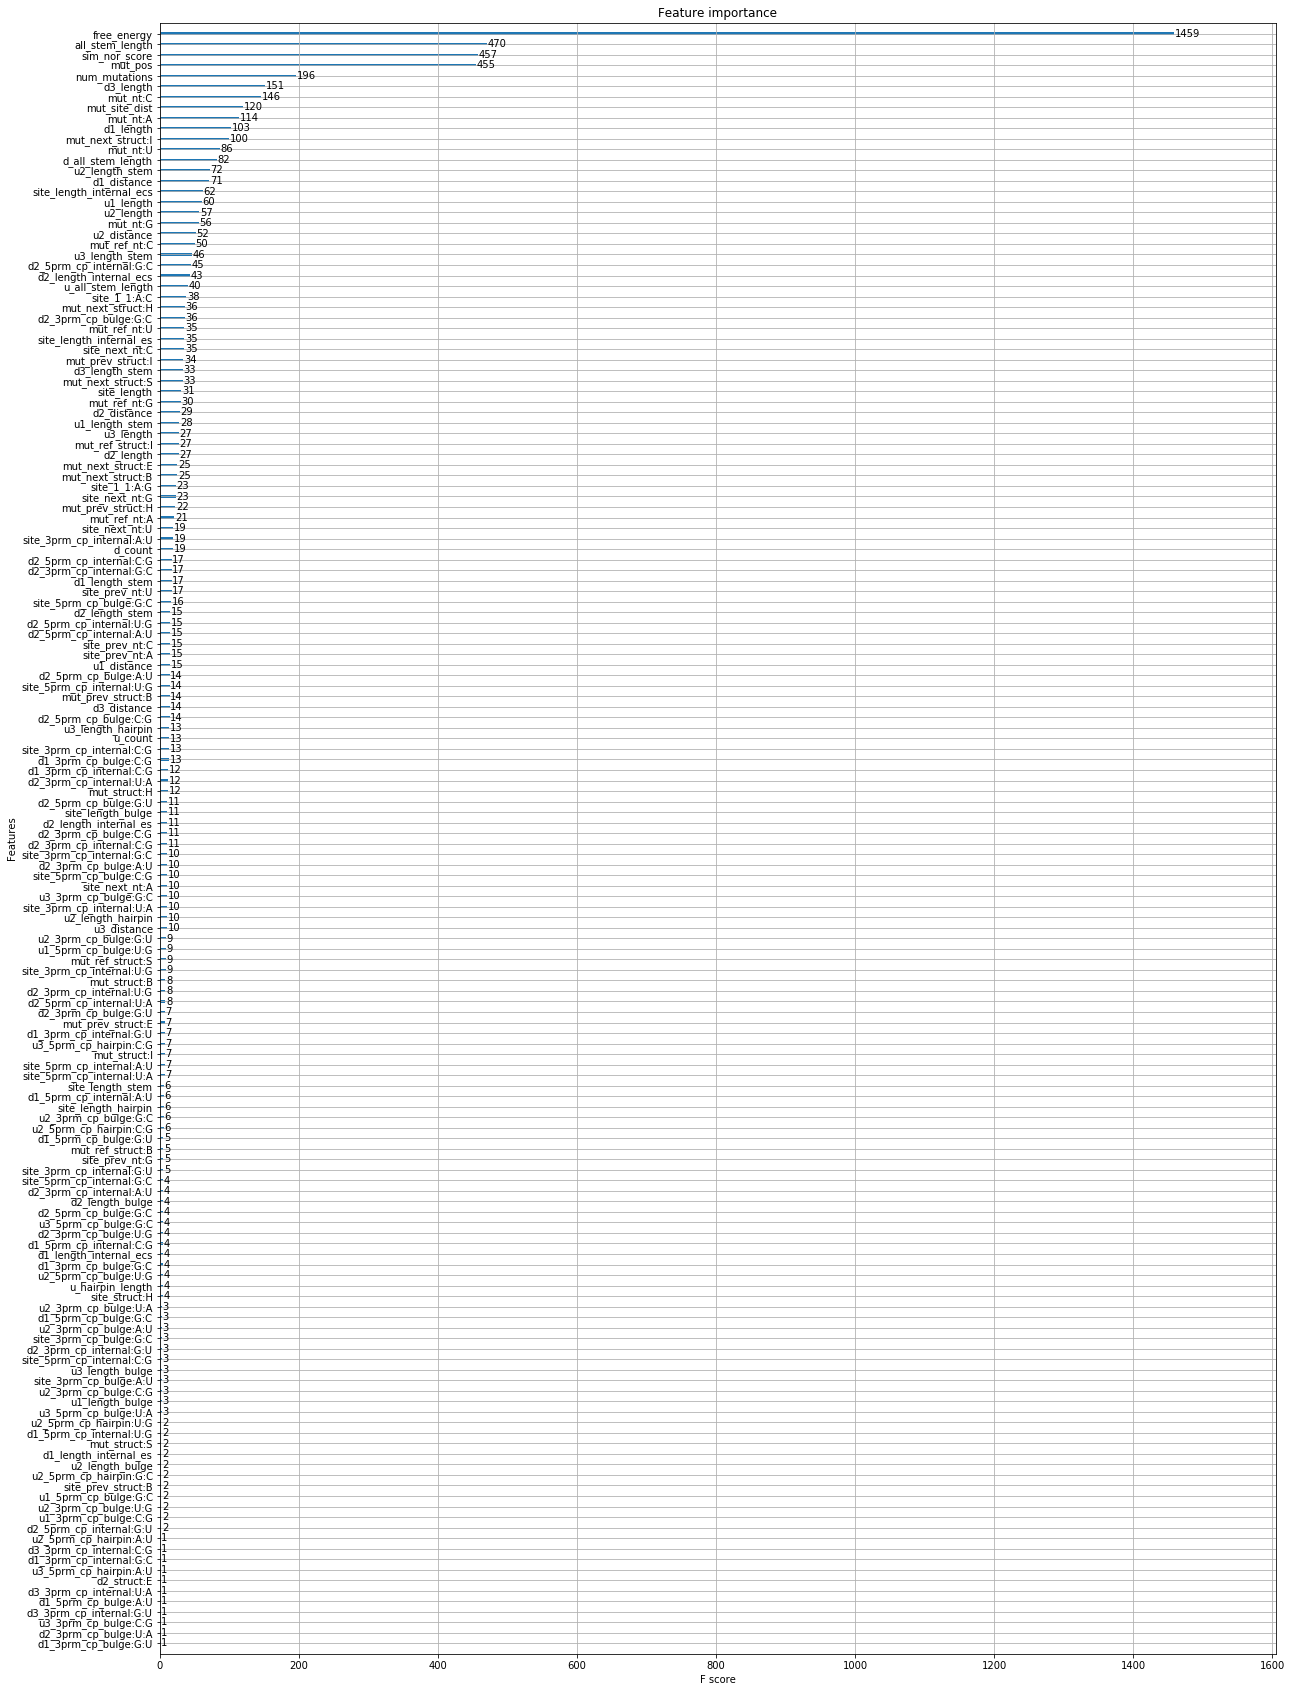

In [30]:
matplotlib.rcParams['figure.figsize'] = [20, 30]
xgboost.plot_importance(bst)

In [31]:
#xgboost.to_graphviz(bst, num_trees=2)


In [33]:
# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(bst)

#concatenate train, test, validate 
data_x=pd.concat([train_X,eval_X,test_X])
data_y=pd.concat([train_y,eval_y,test_y])
data_names=pd.concat([train_dataset,eval_dataset,test_dataset])
data_x.reset_index(inplace=True, drop=True) 
data_y.reset_index(inplace=True,drop=True)
data_names.reset_index(inplace=True,drop=True)



In [48]:
data_x_neil1=data_x[data_names=="NEIL1_COMP"]
data_y_neil1=data_y[data_names=="NEIL1_COMP"]
data_x_neil1.reset_index(inplace=True, drop=True) 
data_y_neil1.reset_index(inplace=True,drop=True)

data_x_ttyh2=data_x[data_names=="TTYH2_COMP"]
data_y_ttyh2=data_y[data_names=="TTYH2_COMP"]
data_x_ttyh2.reset_index(inplace=True, drop=True) 
data_y_ttyh2.reset_index(inplace=True,drop=True)

data_x_ajuba=data_x[data_names=="AJUBA"]
data_y_ajuba=data_y[data_names=="AJUBA"]
data_x_ajuba.reset_index(inplace=True, drop=True) 
data_y_ajuba.reset_index(inplace=True,drop=True)


In [49]:
shap_values_neil1 = explainer.shap_values(data_x_neil1)
shap_values_ttyh2 = explainer.shap_values(data_x_ttyh2)
shap_values_ajuba = explainer.shap_values(data_x_ajuba)


In [79]:
max(data_y_ttyh2)

0.6559999999999999

In [80]:
max(data_y_ajuba)

0.4235

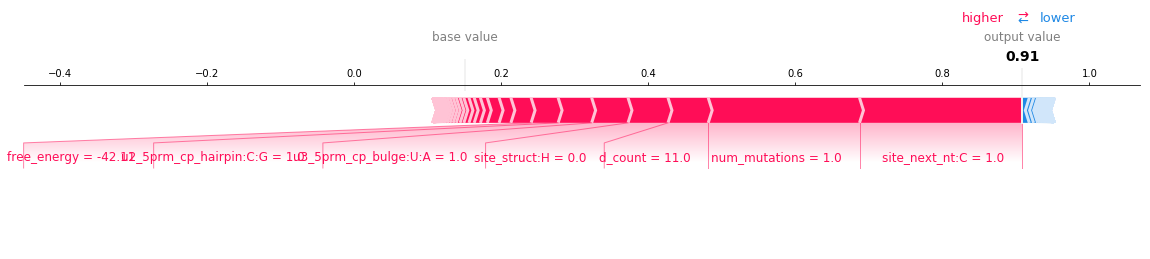

<Figure size 1440x2160 with 0 Axes>

In [71]:
## Max and min editing level Neil 1
max_index=data_y_neil1.index[data_y_neil1 == max(data_y_neil1)]
min_index=data_y_neil1.index[data_y_neil1 == min(data_y_neil1)]

# visualize prediction for isoform with the highest editing level 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_neil1[max_index,:], data_x_neil1.iloc[max_index,:],matplotlib=True)
plt.savefig("neil1.max.forceplot.svg",height=2,width=10,bbox_inches="tight",dpi=300)

In [59]:
min_index[0]

221

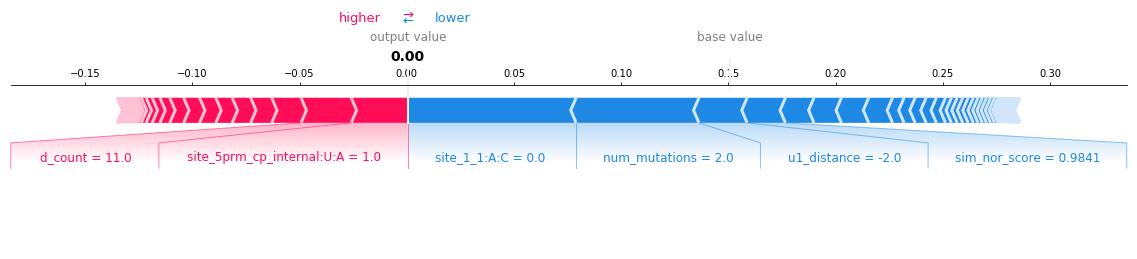

<Figure size 1440x2160 with 0 Axes>

In [72]:
shap.force_plot(explainer.expected_value, shap_values_neil1[min_index[0],:], data_x_neil1.iloc[min_index[0],:],matplotlib=True)
plt.savefig("neil1.min.forceplot.svg",height=2,width=10,bbox_inches="tight",dpi=300)

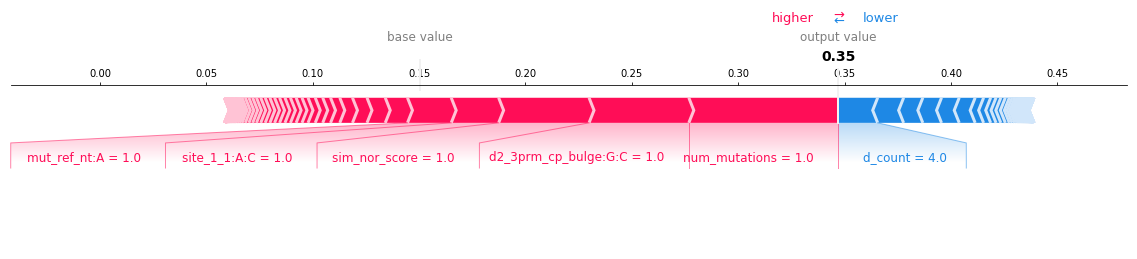

<Figure size 1440x2160 with 0 Axes>

In [73]:
## Max and min editing level TTYH2
max_index=data_y_ttyh2.index[data_y_ttyh2 == max(data_y_ttyh2)]
min_index=data_y_ttyh2.index[data_y_ttyh2 == min(data_y_ttyh2)]

# visualize prediction for isoform with the highest editing level 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_ttyh2[max_index,:], data_x_ttyh2.iloc[max_index,:],matplotlib=True)
plt.savefig("ttyh2.max.forceplot.svg",height=2,width=10,bbox_inches="tight",dpi=300)

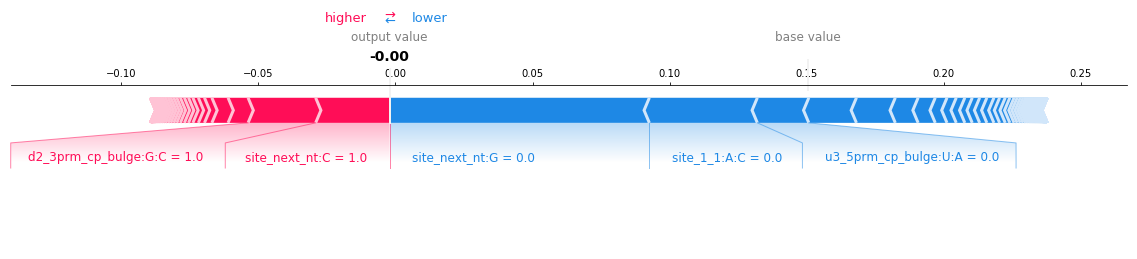

<Figure size 1440x2160 with 0 Axes>

In [75]:
shap.force_plot(explainer.expected_value, shap_values_ttyh2[min_index[0],:], data_x_ttyh2.iloc[min_index[0],:],matplotlib=True)
plt.savefig("ttyh2.min.forceplot.svg",height=2,width=10,bbox_inches="tight",dpi=300)

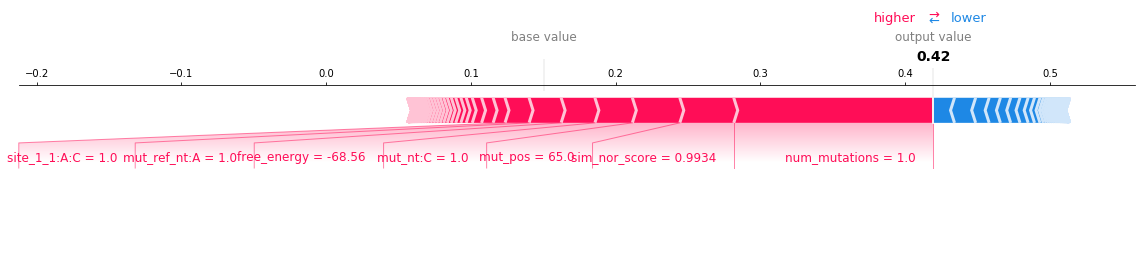

<Figure size 1440x2160 with 0 Axes>

In [76]:
## Max and min editing level AJUBA
max_index=data_y_ajuba.index[data_y_ajuba == max(data_y_ajuba)]
min_index=data_y_ajuba.index[data_y_ajuba == min(data_y_ajuba)]

# visualize prediction for isoform with the highest editing level 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_ajuba[max_index,:], data_x_ajuba.iloc[max_index,:],matplotlib=True)
plt.savefig("ajuba.max.forceplot.svg",height=2,width=10,bbox_inches="tight",dpi=300)

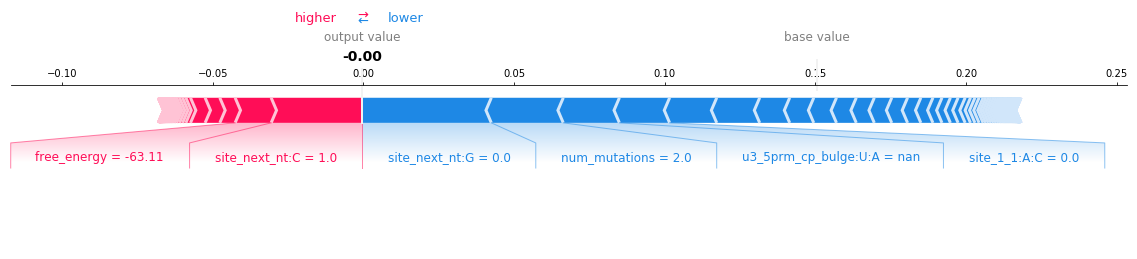

<Figure size 1440x2160 with 0 Axes>

In [77]:
shap.force_plot(explainer.expected_value, shap_values_ajuba[min_index[0],:], data_x_ajuba.iloc[min_index[0],:],matplotlib=True)
plt.savefig("ajuba.min.forceplot.svg",height=2,width=10,bbox_inches="tight",dpi=300)

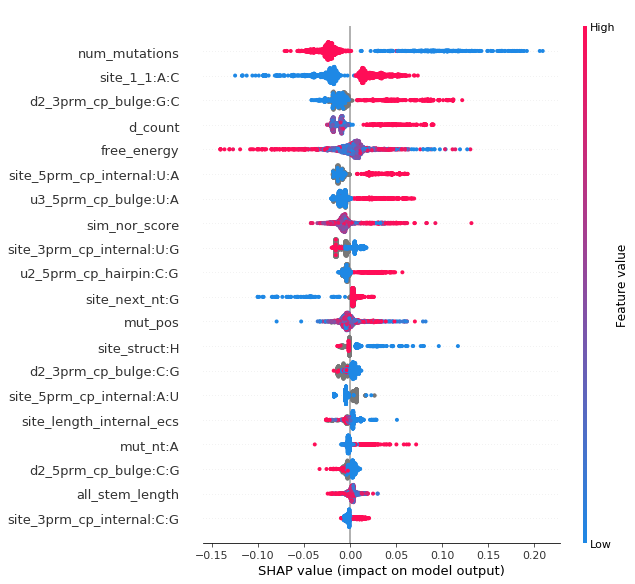

In [46]:
# summarize the effect of all the features 
shap.summary_plot(shap_values, data_x,show=False)
plt.savefig("all.comp.shap.svg", format='svg',width=30,height=10,dpi=300,bbox_inches="tight")


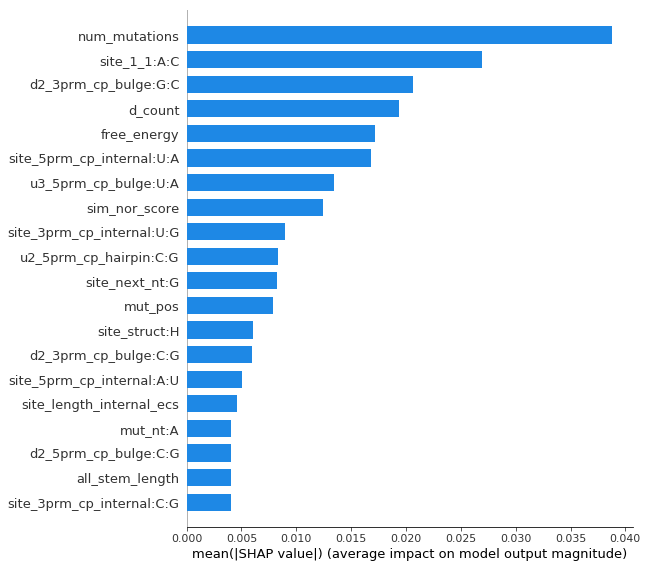

In [81]:
# We can also just take the mean absolute value of the SHAP values for each feature 
# to get a standard bar plot (produces stacked bars for multi-class outputs):
shap.summary_plot(shap_values, data_x, plot_type="bar")

In [82]:
## Compute pairwise interaction values from TreeShap
shap_interaction_values=explainer.shap_interaction_values(data_x)
shap_interaction_values.shape

(1455, 234, 234)

In [84]:
##Average interaction values across the datapoints in the test set 
mean_interaction_values=np.mean(shap_interaction_values,axis=0)

In [85]:
Index=test_X.columns
Cols=test_X.columns
mean_interaction_values_df = pd.DataFrame(mean_interaction_values, index=Index, columns=Cols)

In [86]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
configure_plotly_browser_state()

trace = Heatmap(z=mean_interaction_values_df.values,
                   x=Cols,
                   y=Index)
iplot([trace],show_link=False)


NameError: name 'configure_plotly_browser_state' is not defined

## Feature subset<a name='2'>
<a href=#outline>Home</a>

In [87]:
shap_values=pd.DataFrame(shap_values,columns=Cols)

['num_mutations$', 'mut_exist*', 'mut_type*', 'mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_ref_struct*', 'mut_nt*', 'mut_struct*', 'mut_prev_struct*', 'mut_next_struct*', 'mut_same_as_site*']


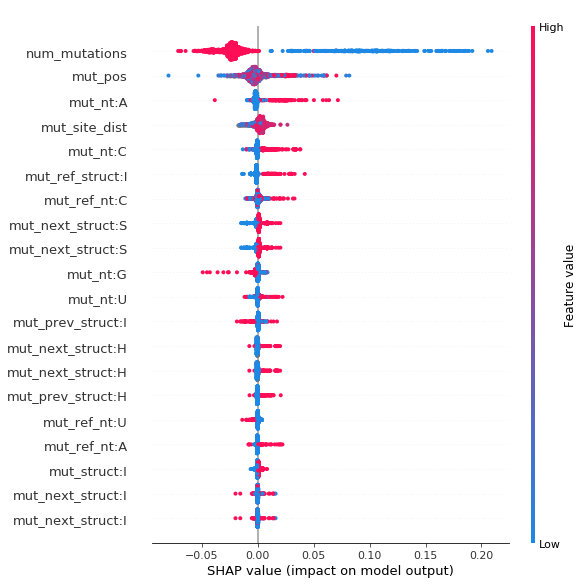

Contribution/Total:0.2448764
['site_struct*', 'site_prev_nt*', 'site_next_nt*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1_internal*', 'site_length$', 'site_length_stem$', 'site_length_hairpin$', 'site_length_bulge$', 'site_length_internal_es$', 'site_length_internal_ecs$', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*']


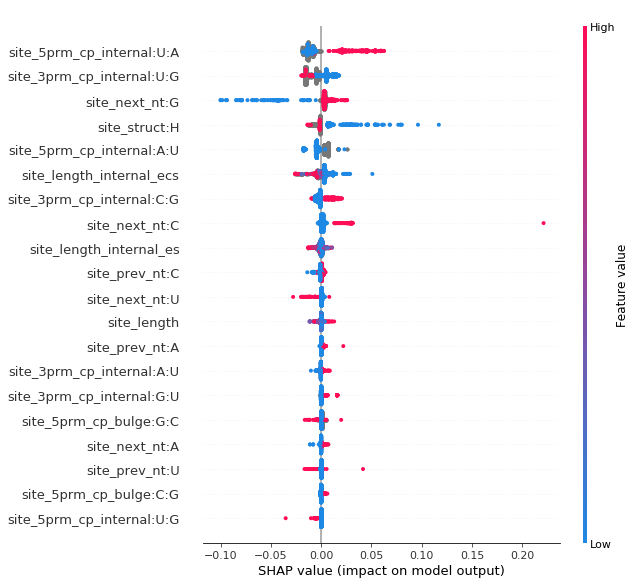

Contribution/Total:0.21004142
['u_count$', 'u_all_stem_length$', 'u_hairpin_length$', 'u1_exist*', 'u1_distance$', 'u1_struct*', 'u1_length$', 'u1_length_stem$', 'u1_length_hairpin$', 'u1_length_bulge$', 'u1_length_internal_es$', 'u1_length_internal_ecs$', 'u1_5prm_cp_hairpin*', 'u1_5prm_cp_bulge*', 'u1_3prm_cp_bulge*', 'u1_5prm_cp_internal*', 'u1_3prm_cp_internal*', 'u2_exist*', 'u2_distance$', 'u2_struct*', 'u2_length$', 'u2_length_stem$', 'u2_length_hairpin$', 'u2_length_bulge$', 'u2_length_internal_es$', 'u2_length_internal_ecs$', 'u2_5prm_cp_hairpin*', 'u2_5prm_cp_bulge*', 'u2_3prm_cp_bulge*', 'u2_5prm_cp_internal*', 'u2_3prm_cp_internal*', 'u3_exist*', 'u3_distance*', 'u3_struct*', 'u3_length$', 'u3_length_stem$', 'u3_length_hairpin$', 'u3_length_bulge$', 'u3_length_internal_es$', 'u3_length_internal_ecs$', 'u3_5prm_cp_hairpin*', 'u3_5prm_cp_bulge*', 'u3_3prm_cp_bulge*', 'u3_5prm_cp_internal*', 'u3_3prm_cp_internal*']


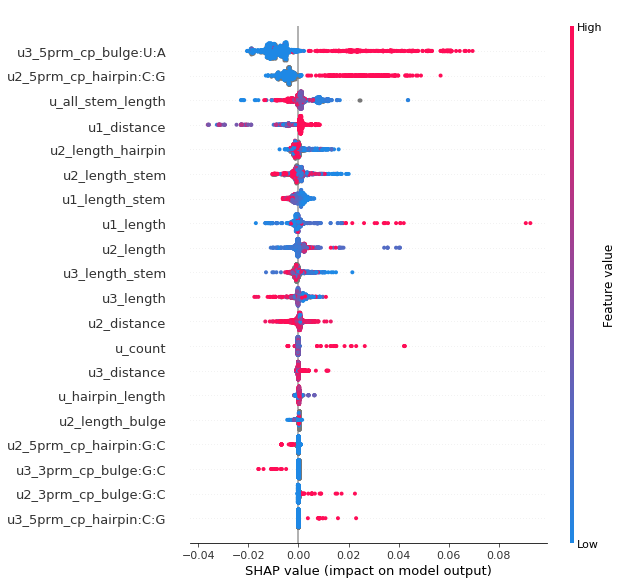

Contribution/Total:0.1426244
['d_count*', 'd_all_stem_length*', 'd1_exist*', 'd1_distance*', 'd1_struct*', 'd1_length$', 'd1_length_stem*', 'd1_length_hairpin*', 'd1_length_bulge*', 'd1_length_internal_es*', 'd1_length_internal_ecs*', 'd1_5prm_cp_hairpin*', 'd1_5prm_cp_bulge*', 'd1_3prm_cp_bulge*', 'd1_5prm_cp_internal*', 'd1_3prm_cp_internal*', 'd2_exist*', 'd2_distance*', 'd2_struct*', 'd2_length$', 'd2_length_stem*', 'd2_length_hairpin*', 'd2_length_bulge*', 'd2_length_internal_es*', 'd2_length_internal_ecs*', 'd2_5prm_cp_hairpin*', 'd2_5prm_cp_bulge*', 'd2_3prm_cp_bulge*', 'd2_5prm_cp_internal*', 'd2_3prm_cp_internal*', 'd3_exist*', 'd3_distance*', 'd3_struct*', 'd3_length$', 'd3_length_stem*', 'd3_length_hairpin*', 'd3_length_bulge*', 'd3_length_internal_es*', 'd3_length_internal_ecs*', 'd3_5prm_cp_hairpin*', 'd3_5prm_cp_bulge*', 'd3_3prm_cp_bulge*', 'd3_5prm_cp_internal*', 'd3_3prm_cp_internal*']


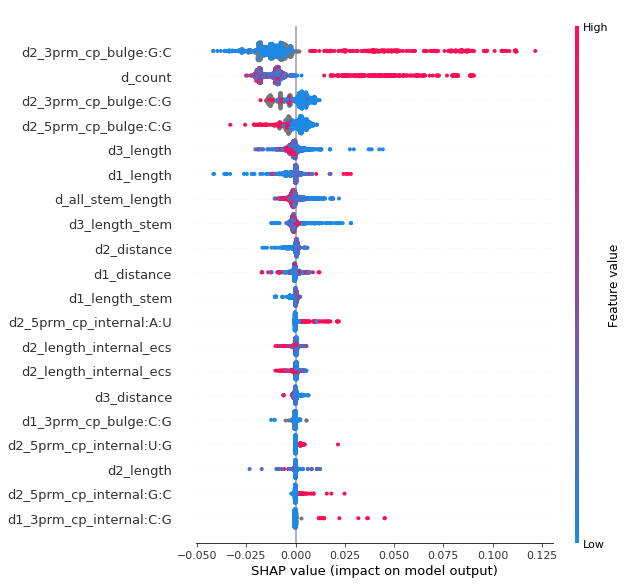

Contribution/Total:0.22084777
['u_count*', 'u_all_stem_length*', 'u_hairpin_length*', 'u1_exist*', 'u1_distance$', 'u1_struct*', 'u1_length$', 'u1_length_stem$', 'u1_length_hairpin$', 'u1_length_bulge$', 'u1_length_internal_es$', 'u1_length_internal_ecs$', 'u1_5prm_cp_hairpin*', 'u1_5prm_cp_bulge*', 'u1_3prm_cp_bulge*', 'u1_5prm_cp_internal*', 'u1_3prm_cp_internal*', 'u2_exist*', 'u2_distance$', 'u2_struct*', 'u2_length$', 'u2_length_stem$', 'u2_length_hairpin$', 'u2_length_bulge$', 'u2_length_internal_es$', 'u2_length_internal_ecs$', 'u2_5prm_cp_hairpin*', 'u2_5prm_cp_bulge*', 'u2_3prm_cp_bulge*', 'u2_5prm_cp_internal*', 'u2_3prm_cp_internal*', 'u3_exist*', 'u3_distance*', 'u3_struct*', 'u3_length$', 'u3_length_stem$', 'u3_length_hairpin$', 'u3_length_bulge$', 'u3_length_internal_es$', 'u3_length_internal_ecs$', 'u3_5prm_cp_hairpin*', 'u3_5prm_cp_bulge*', 'u3_3prm_cp_bulge*', 'u3_5prm_cp_internal*', 'u3_3prm_cp_internal*', 'd_count*', 'd_all_stem_length*', 'd1_exist*', 'd1_distance*',

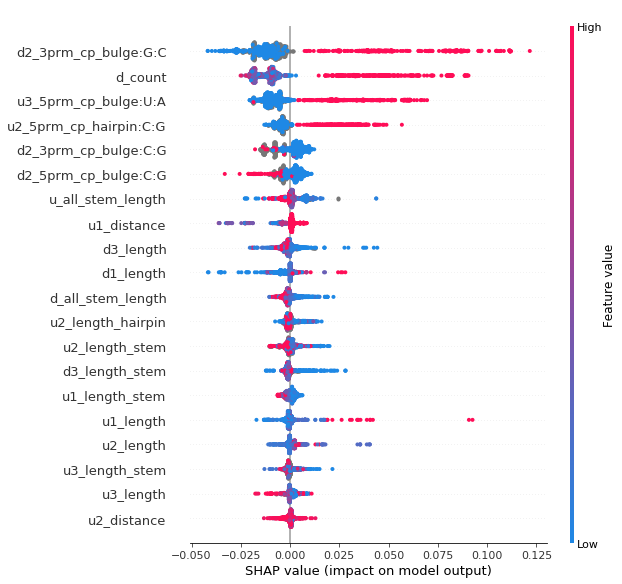

Contribution/Total:0.36347216
['num_mutations*', 'mut_exist*', 'mut_type*', 'mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_ref_struct*', 'mut_nt*', 'mut_struct*', 'mut_prev_struct*', 'mut_next_struct*', 'mut_same_as_site*', 'site_prev_nt*', 'site_next_nt*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1_internal*', 'site_length$', 'site_length_stem$', 'site_length_hairpin$', 'site_length_bulge$', 'site_length_internal_es$', 'site_length_internal_ecs$', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*']


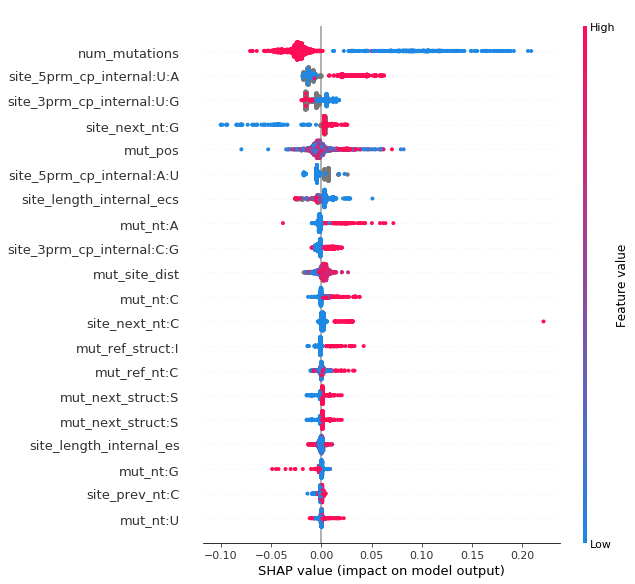

Contribution/Total:0.4358009
['num_mutations*', 'mut_exist*', 'mut_type*', 'mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_ref_struct*', 'mut_nt*', 'mut_struct*', 'mut_prev_struct*', 'mut_next_struct*', 'mut_same_as_site*', 'site_struct*', 'site_prev_nt*', 'site_next_nt*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1_internal*', 'site_length$', 'site_length_stem$', 'site_length_hairpin$', 'site_length_bulge$', 'site_length_internal_es$', 'site_length_internal_ecs$', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*', 'd_count*', 'd_all_stem_length*', 'd1_exist*', 'd1_distance*', 'd1_struct*', 'd1_length$', 'd1_length_stem*', 'd1_length_hairpin*', 'd1_length_bulge*', 'd1_length_internal_es*', 'd1_length_internal_ecs*', 'd1_5prm_cp_hairpin*', 'd1_5prm_cp_bulge*', 'd1_3prm_cp_bulge*', 'd1_5prm_cp_internal*', 'd1_3prm_cp_internal*', 'd2_exist*', 'd2_distance*', 'd2_struct*', 'd2_length$', 'd2_length_stem*', 'd2

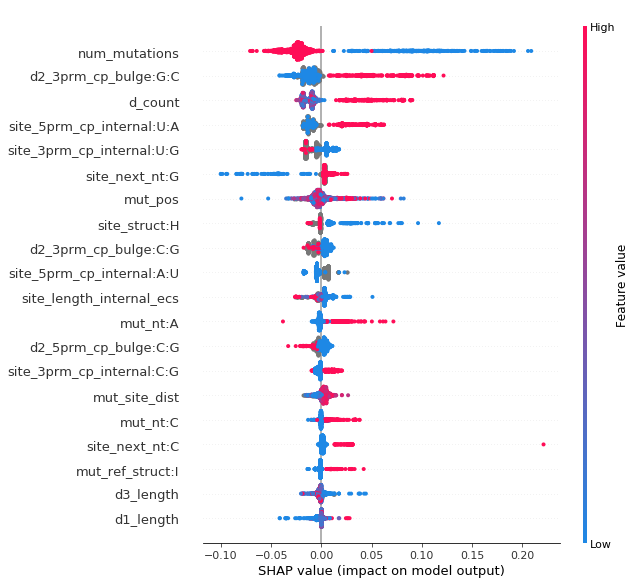

Contribution/Total:0.6757656
['num_mutations*', 'mut_exist*', 'mut_type*', 'mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_ref_struct*', 'mut_nt*', 'mut_struct*', 'mut_prev_struct*', 'mut_next_struct*', 'mut_same_as_site*', 'site_struct*', 'site_prev_nt*', 'site_next_nt*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1_internal*', 'site_length$', 'site_length_stem$', 'site_length_hairpin$', 'site_length_bulge$', 'site_length_internal_es$', 'site_length_internal_ecs$', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*', 'u_count$', 'u_all_stem_length$', 'u_hairpin_length$', 'u1_exist*', 'u1_distance$', 'u1_struct*', 'u1_length$', 'u1_length_stem$', 'u1_length_hairpin$', 'u1_length_bulge$', 'u1_length_internal_es$', 'u1_length_internal_ecs$', 'u1_5prm_cp_hairpin*', 'u1_5prm_cp_bulge*', 'u1_3prm_cp_bulge*', 'u1_5prm_cp_internal*', 'u1_3prm_cp_internal*', 'u2_exist*', 'u2_distance$', 'u2_struct*', 'u2_length$', '

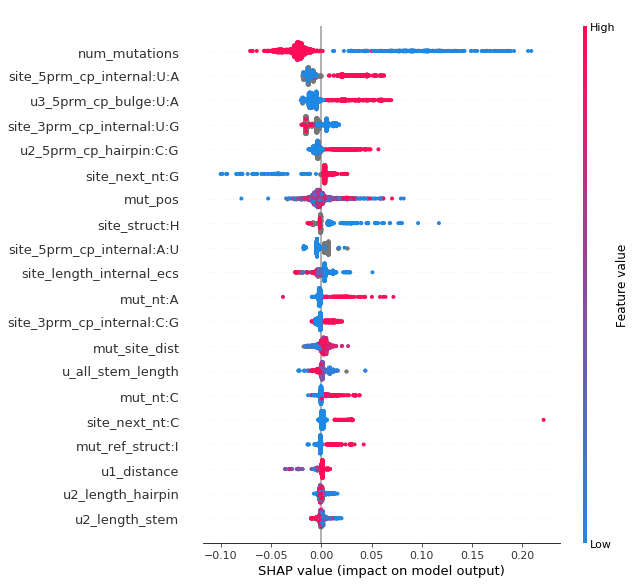

Contribution/Total:0.59754217
['site_struct$', 'site_length$', 'site_length_internal_es$', 'site_length_internal_ecs$', 'site_3prm_cp_internal*']


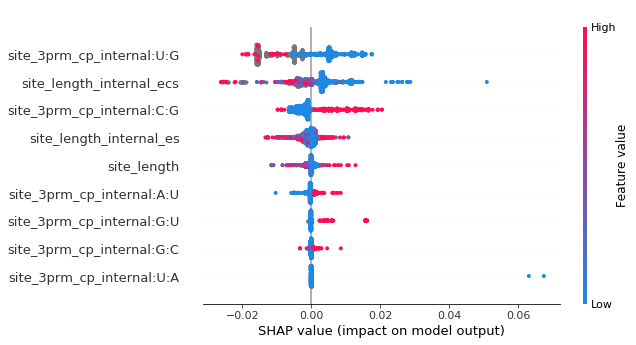

Contribution/Total:0.06866877
['site_prev_nt*', 'site_next_nt*', 'site_1_1_internal*']


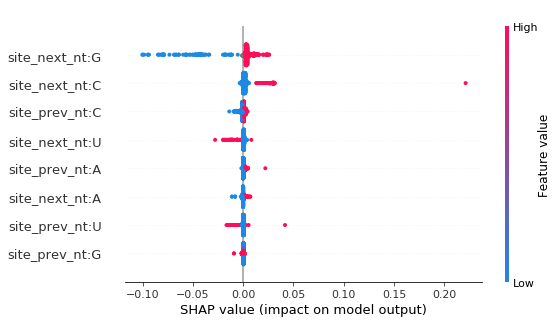

Contribution/Total:0.048061512
['num_mutations$', 'mut_pos$', 'mut_site_dist$', 'mut_ref_nt*', 'mut_nt*']


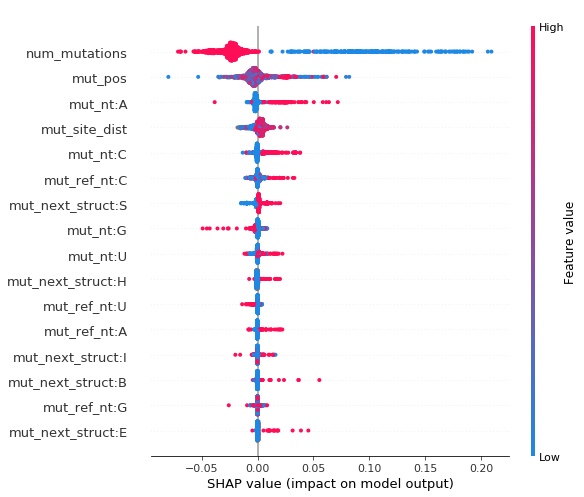

Contribution/Total:0.21360876
['site_prev_nt*', 'site_next_nt*', 'num_mutations', 'mut_pos', 'mut_site_dist', 'mut_ref_nt*', 'mut_nt*']


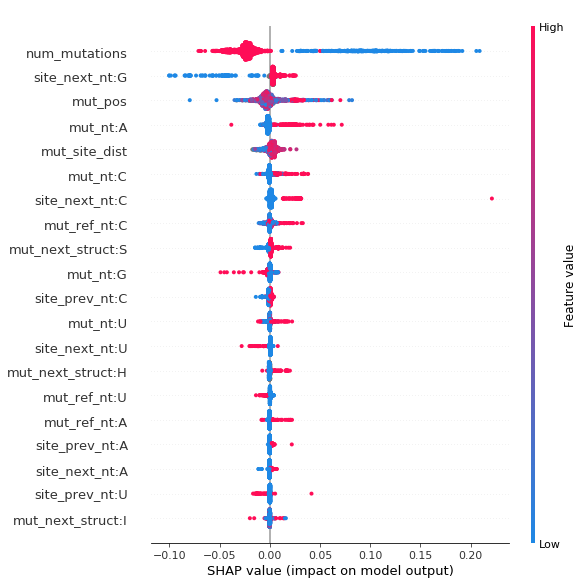

Contribution/Total:0.26167026
['free_energy*', '^all_stem_length$', 'site_struct*', 'site_prev_nt*', 'site_next_nt*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1_internal*', 'site_length$', 'site_length_stem$', 'site_length_hairpin$', 'site_length_bulge$', 'site_length_internal_es$', 'site_length_internal_ecs$', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*', 'u_count$', 'u_all_stem_length$', 'u_hairpin_length$', 'u1_exist*', 'u1_distance$', 'u1_struct*', 'u1_length$', 'u1_length_stem$', 'u1_length_hairpin$', 'u1_length_bulge$', 'u1_length_internal_es$', 'u1_length_internal_ecs$', 'u1_5prm_cp_hairpin*', 'u1_5prm_cp_bulge*', 'u1_3prm_cp_bulge*', 'u1_5prm_cp_internal*', 'u1_3prm_cp_internal*', 'u2_exist*', 'u2_distance$', 'u2_struct*', 'u2_length$', 'u2_length_stem$', 'u2_length_hairpin$', 'u2_length_bulge$', 'u2_length_internal_es$', 'u2_length_internal_ecs$', 'u2_5prm_cp_hairpin*', 'u2_5prm_cp_bulge*', '

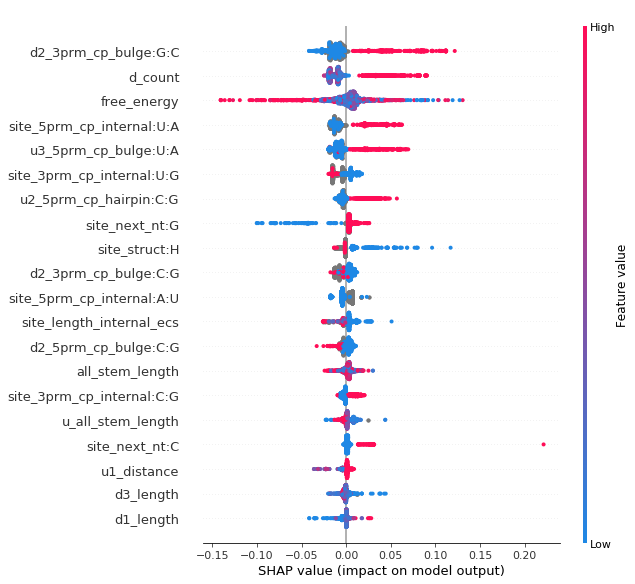

Contribution/Total:0.64038455
['free_energy*', '^all_stem_length$']


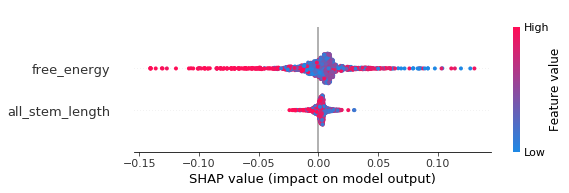

Contribution/Total:0.06687092


In [97]:
from feature_subsets import * 
subset_names=["mut","site","u","d","u_d","mut_site","no_up","no_down","site_struct","site_seq","mut_seq","mut_seq_site","no_mut","overall_structure"]
subset_contribs=[]
for subset in [mut,site,u,d,u_d,mut_site,no_up,no_down,site_struct,site_seq,mut_seq,mut_seq_site,no_mut,overall_structure]: 
  print(subset)
  cur_features=filter_features(shap_values,subset)
  cur_feature_shap=shap_values[cur_features].values 
  cur_feature_data_X=data_x[cur_features]
  shap.summary_plot(cur_feature_shap, cur_feature_data_X)#,sort=False,max_display=50)
  contrib=shap_contribs_subgroup(shap_values,subset)
  subset_contribs.append(contrib)
  print("Contribution/Total:"+str(contrib))

In [98]:
subset_names
subset_contribs

[0.2448764,
 0.21004142,
 0.1426244,
 0.22084777,
 0.36347216,
 0.4358009,
 0.6757656,
 0.59754217,
 0.06866877,
 0.048061512,
 0.21360876,
 0.26167026,
 0.64038455,
 0.06687092]

In [117]:
subset_contrib_df=pd.DataFrame({'Subset':subset_names,
                               'Contribution':[100*i for i in subset_contribs]})

In [118]:
subset_contrib_df=subset_contrib_df.sort_values(by=['Contribution'],ascending=False)
subset_contrib_df.reset_index(inplace=True, drop=True) 


In [119]:
subset_contrib_df

,Subset,Contribution
0,no_up,67.576557
1,no_mut,64.038455
2,no_down,59.754217
3,mut_site,43.580091
4,u_d,36.347216
5,mut_seq_site,26.167026
6,mut,24.487640
7,d,22.084777
8,mut_seq,21.360876
9,site,21.004142


In [120]:
from pandas.api.types import CategoricalDtype
from plotnine.data import mpg

In [121]:
subset_cat = CategoricalDtype(categories=list(subset_contrib_df['Subset']), ordered=True)

# Cast the existing categories into the new category. Due to a bug in pandas
# we need to do this via a string.
subset_contrib_df['Subset_Cat'] = subset_contrib_df['Subset'].astype(str).astype(subset_cat)


/users/annashch/miniconda3/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning:

Saving 5 x 4 in image.

/users/annashch/miniconda3/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning:

Filename: all.comp.subset.importance.svg



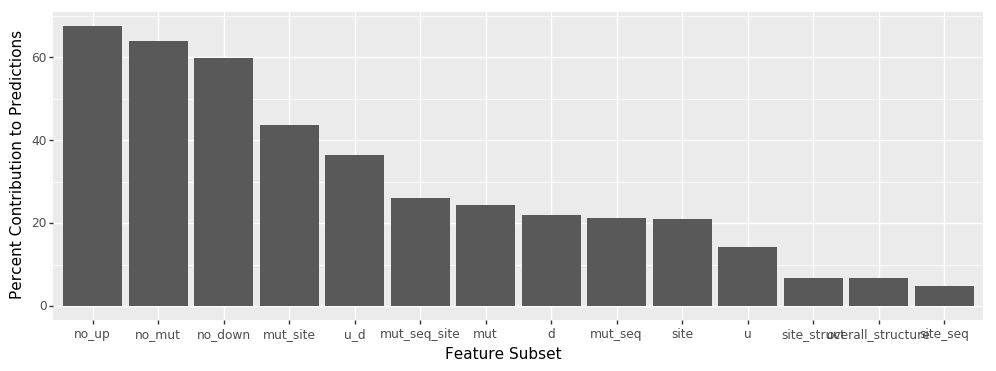

<ggplot: (8766035049841)>

In [127]:
p=(ggplot(subset_contrib_df, aes('Subset_Cat', 'Contribution'))
 + geom_bar(stat='identity')
 + xlab("Feature Subset")
 + ylab("Percent Contribution to Predictions"))
ggsave(plot=p, filename='all.comp.subset.importance.svg',width=5,height=4,units='in')
p

## No "mut" features

In [ ]:
## Read in the data 
import feature_subsets
import pandas as pd 

#drop all mut features in train split 
cur_features=filter_features(train_split,feature_subsets.mut)
cur_features.remove('mut_pos')
train_split=train_split.drop(cur_features,axis=1)

#drop all mut features in eval split 
cur_features=filter_features(eval_split,feature_subsets.mut)
cur_features.remove('mut_pos')
eval_split=eval_split.drop(cur_features,axis=1)


#drop all mut features in test split 
cur_features=filter_features(test_split,feature_subsets.mut)
cur_features.remove('mut_pos')
test_split=test_split.drop(cur_features,axis=1)

In [ ]:
train_y=train_split['editing_value']
train_X=train_split.drop(['editing_value','mut_pos'],axis=1)

eval_y=eval_split['editing_value']
eval_X=eval_split.drop(['editing_value','mut_pos'],axis=1)

test_y=test_split['editing_value']
test_X=test_split.drop(['editing_value','mut_pos'],axis=1)

In [ ]:
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)


In [ ]:
## format matrixes for xgboost 
import xgboost
dtrain=xgboost.DMatrix(train_X,train_y)
deval=xgboost.DMatrix(eval_X,eval_y)
dtest=xgboost.DMatrix(test_X,test_y)

In [ ]:
## set model training parameters 
param=dict() 
param['nthread'] = 20
#rmse -- root mean square error 
# mae -- mean absolute error 
# map -- mean average precision 
# auc -- area under ROC curve 
# aucpr -- area under precision recall curve 
param['eval_metric'] = ['auc','mae','map','aucpr','rmse']

In [ ]:
evallist = [(deval, 'eval'), (dtrain, 'train')]


In [ ]:
num_round = 1000
bst = xgboost.train(param, dtrain, num_round, evallist,early_stopping_rounds=10)

In [ ]:
# save to binary file for faster loading
bst.save_model('combined.substratres.nomutfeatures.model')
# save model to text file 
bst.dump_model('combined.substrate.nomutfeatures.raw.txt')


In [ ]:
## get model predictions on the test, training, and eval splits 
test_pred = bst.predict(dtest)
train_pred=bst.predict(dtrain)
eval_pred=bst.predict(deval)

In [ ]:
## Correlation values 
from scipy.stats import spearmanr,pearsonr
spearman_train=spearmanr(train_y,train_pred)
spearman_eval=spearmanr(eval_y,eval_pred)
spearman_test=spearmanr(test_y,test_pred)

pearson_train=pearsonr(train_y,train_pred)
pearson_eval=pearsonr(eval_y,eval_pred)
pearson_test=pearsonr(test_y,test_pred)

print("Spearman correlation:")
print("Train:"+str(spearman_train))
print("Eval:"+str(spearman_eval))
print("Test:"+str(spearman_test))
print("\n")
print("Pearson correlation:")
print("Train:"+str(pearson_train))
print("Eval:"+str(pearson_eval))
print("Test:"+str(pearson_test))

In [ ]:
## MAE
from sklearn.metrics import mean_absolute_error
mae_train=mean_absolute_error(train_y,train_pred)
print("MAE Train:"+str(mae_train))

mae_eval=mean_absolute_error(eval_y,eval_pred)
print("MAE Eval:"+str(mae_eval))

mae_test=mean_absolute_error(test_y,test_pred)
print("MAE Test:"+str(mae_test))


In [ ]:
## MAPE
pseudocount=0.01
mape_train=np.mean(np.abs((train_y - train_pred) /(pseudocount+train_y))) * 100
print("MAPE Train:"+str(mape_train)+"%")

mape_eval=np.mean(np.abs((eval_y - eval_pred) /(pseudocount+eval_y))) * 100
print("MAPE Eval:"+str(mape_eval)+"%")

mape_test=np.mean(np.abs((test_y - test_pred) /(pseudocount+test_y))) * 100
print("MAPE Test:"+str(mape_test)+"%")

In [ ]:
## RMSE
from sklearn.metrics import mean_squared_error
import math 
rmse_train=math.sqrt(mean_squared_error(train_y,train_pred))
print("RMSE Train:"+str(rmse_train))

rmse_eval=math.sqrt(mean_squared_error(eval_y,eval_pred))
print("RMSE Eval:"+str(rmse_eval))

rmse_test=math.sqrt(mean_squared_error(test_y,test_pred))
print("RMSE Test:"+str(rmse_test))


In [ ]:
## PRC 
## PRC only valid for binary outcomes. 
## Editing levels < 0.5 are labeled as "0". 
## Editing levels >= 0.5 are labeled as "1". 

from sklearn.metrics import auc, precision_recall_curve

precision_train,recall_train,prc_thresholds_train=precision_recall_curve(train_y>=0.5,train_pred)
precision_eval,recall_eval,prc_thresholds_eval=precision_recall_curve(eval_y>=0.5,eval_pred)
precision_test,recall_test,prc_thresholds_test=precision_recall_curve(test_y>=0.5,test_pred)

auprc_train=auc(recall_train,precision_train)
auprc_eval=auc(recall_eval,precision_eval)
auprc_test=auc(recall_test,precision_test)

plt.plot(recall_train,precision_train,'r',label="Train:"+str(round(auprc_train,2)))
plt.plot(recall_eval,precision_eval,'g',label="Eval:"+str(round(auprc_eval,2)))
plt.plot(recall_test,precision_test,'b',label="Test:"+str(round(auprc_test,2)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC")
plt.legend()

In [ ]:
## ROC
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train,tpr_train,roc_thresholds_train=roc_curve(train_y>=0.5,train_pred)
fpr_eval,tpr_eval,roc_thresholds_eval=roc_curve(eval_y>=0.5,eval_pred)
fpr_test,tpr_test,roc_thresholds_test=roc_curve(test_y>=0.5,test_pred)

auroc_train=roc_auc_score(train_y>=0.5,train_pred)
auroc_eval=roc_auc_score(eval_y>=0.5,eval_pred)
auroc_test=roc_auc_score(test_y>=0.5,test_pred)

plt.plot(fpr_train,tpr_train,'r',label="Train:"+str(round(auroc_train,2)))
plt.plot(fpr_eval,tpr_eval,'g',label="Eval:"+str(round(auroc_eval,2)))
plt.plot(fpr_test,tpr_test,'b',label="Test:"+str(round(auroc_test,2)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()

In [ ]:
#plot the test set predictions 
matplotlib.rcParams['figure.figsize'] = [20, 8]
plt.subplot(1,3,1)
plt.plot(list(train_y),list(train_pred),'o')
plt.xlabel("Observed train set editing level, Neil 1 Degenerate")
plt.ylabel("Predicted train set editing level, Neil 1 Degenerate")
plt.subplot(1,3,2)
plt.plot(list(eval_y),list(eval_pred),'o')
plt.xlabel("Observed eval set editing level, Neil 1 Degenerate")
plt.ylabel("Predicted eval set editing level, Neil 1 Degenerate")
plt.subplot(1,3,3)
plt.plot(list(test_y),list(test_pred),'o')
plt.xlabel("Observed test set editing level, Neil 1 Degenerate")
plt.ylabel("Predicted test set editing level, Neil 1 Degenerate")

plt.show()

In [ ]:
matplotlib.rcParams['figure.figsize'] = [15, 30]
xgboost.plot_importance(bst)

In [ ]:
#xgboost.to_graphviz(bst, num_trees=2)


In [ ]:
# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(test_X)
shap_values.shape

In [ ]:
test_y=pd.DataFrame(test_y)
max_index=test_y.index[test_y['editing_value'] == max(test_y['editing_value'])]
max_row=test_y.index.get_loc(max_index[0])
# visualize prediction for isoform with the highest editing level 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[max_row,:], test_X.iloc[max_row,:])

In [ ]:
# visualize prediction for isoform with the lowest editing level 
shap.initjs()
min_index=test_y.index[test_y['editing_value'] == min(test_y['editing_value'])]
min_row=test_y.index.get_loc(min_index[0])
shap.force_plot(explainer.expected_value, shap_values[min_row,:], test_X.iloc[min_row,:])

In [ ]:
# visualize the training set predictions
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values,train_X)

In [ ]:
# summarize the effect of all the features 
fshap.summary_plot(shap_values, test_X)


In [ ]:
# We can also just take the mean absolute value of the SHAP values for each feature 
# to get a standard bar plot (produces stacked bars for multi-class outputs):
shap.summary_plot(shap_values, test_X, plot_type="bar")

In [ ]:
## Compute pairwise interaction values from TreeShap
shap_interaction_values=explainer.shap_interaction_values(test_X)
shap_interaction_values.shape

In [ ]:
##Average interaction values across the datapoints in the test set 
mean_interaction_values=np.mean(shap_interaction_values,axis=0)

In [ ]:
Index=test_X.columns
Cols=test_X.columns
mean_interaction_values_df = pd.DataFrame(mean_interaction_values, index=Index, columns=Cols)

In [ ]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
configure_plotly_browser_state()

trace = Heatmap(z=mean_interaction_values_df.values,
                   x=Cols,
                   y=Index)
iplot([trace],show_link=False)
